In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [4]:
data = pd.read_csv('tested.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
data1=data.drop(['Cabin', 'Name','Ticket'], axis=1)

In [15]:
data1.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

# Data Preprocessing

In [17]:
def missing_value(data,col_data):
    data1[col_data] = data1[col_data].fillna(data[col_data].mean())
missing_value(data,'Age')
missing_value(data, 'Fare')
#missing_value(data,'Cabin')
data1.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

In [18]:
# converting categorical Columns

data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [19]:
data1.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188,0.464115
std,120.810458,0.481622,0.841838,0.481622,12.634534,0.896760,0.981429,55.840500,0.685516
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,0.000000,3.000000,0.000000,30.272590,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [20]:
corrM = data1.corr()
corrM

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.023245,-0.026751,-0.023245,-0.030874,0.003818,0.043080,0.008209,-0.049863
Survived,-0.023245,1.000000,-0.108615,1.000000,-0.000011,0.099943,0.159120,0.191382,0.126779
Pclass,-0.026751,-0.108615,1.000000,-0.108615,-0.440782,0.001087,0.018721,-0.576619,0.031096
Sex,-0.023245,1.000000,-0.108615,1.000000,-0.000011,0.099943,0.159120,0.191382,0.126779
Age,-0.030874,-0.000011,-0.440782,-0.000011,1.000000,-0.079535,-0.045073,0.326800,0.089751
SibSp,0.003818,0.099943,0.001087,0.099943,-0.079535,1.000000,0.306895,0.171488,-0.100603
Parch,0.043080,0.159120,0.018721,0.159120,-0.045073,0.306895,1.000000,0.230001,-0.125164
Fare,0.008209,0.191382,-0.576619,0.191382,0.326800,0.171488,0.230001,1.000000,0.053558
Embarked,-0.049863,0.126779,0.031096,0.126779,0.089751,-0.100603,-0.125164,0.053558,1.000000


In [21]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.33)

# Logistic Regression

In [101]:
lr=LogisticRegression(max_iter=120,random_state=0, n_jobs=20).fit(x_train, y_train)
y_pred_lr=lr.predict(x_test)
print('acc DT = {}'.format(accuracy_score(y_test,y_pred_dt)*100))
print('Precision DT = {}'.format(precision_score(y_test,y_pred_dt, average='micro')))
print('Recall DT = {}'.format(recall_score(y_test,y_pred_dt, average='micro')))
print('F1 DT = {}'.format(f1_score(y_test,y_pred_dt, average='micro')))
a1=((accuracy_score(y_test,y_pred_dt)*100))

acc DT = 73.80952380952381
Precision DT = 0.7380952380952381
Recall DT = 0.7380952380952381
F1 DT = 0.7380952380952381


<AxesSubplot:>

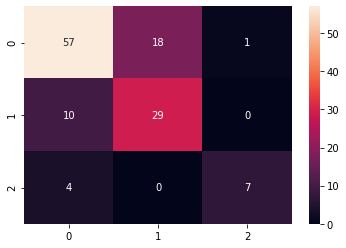

In [102]:
conf = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(conf,annot=True,fmt='d')

# Decision Tree Classifier

In [98]:
dt = DecisionTreeClassifier(max_leaf_nodes=6).fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print('acc DT = {}'.format(accuracy_score(y_test,y_pred_dt)*100))
print('Precision DT = {}'.format(precision_score(y_test,y_pred_dt, average='micro')))
print('Recall DT = {}'.format(recall_score(y_test,y_pred_dt, average='micro')))
print('F1 DT = {}'.format(f1_score(y_test,y_pred_dt, average='micro')))
a1=((accuracy_score(y_test,y_pred_dt)*100))

acc DT = 73.80952380952381
Precision DT = 0.7380952380952381
Recall DT = 0.7380952380952381
F1 DT = 0.7380952380952381


<AxesSubplot:>

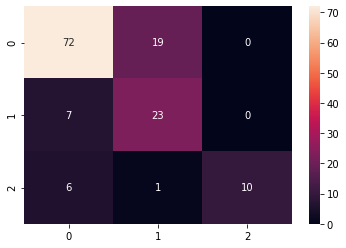

In [23]:
conf = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(conf,annot=True,fmt='d')

# Support Vector Machines

In [24]:
svc_poly = SVC(kernel='poly',degree=6).fit(x_train,y_train)
y_pred_svc_poly = svc_poly.predict(x_test)
print('acc svc poly = {}'.format(accuracy_score(y_test,y_pred_svc_poly)*100))
print('Precision svc poly = {}'.format(precision_score(y_test,y_pred_svc_poly, average='micro')))
print('Recall svc poly = {}'.format(recall_score(y_test,y_pred_svc_poly, average='micro')))
print('f1 svc poly = {}'.format(f1_score(y_test,y_pred_svc_poly, average='micro')))
a2=((accuracy_score(y_test,y_pred_svc_poly)*100))

acc svc poly = 65.21739130434783
Precision svc poly = 0.6521739130434783
Recall svc poly = 0.6521739130434783
f1 svc poly = 0.6521739130434783


<AxesSubplot:>

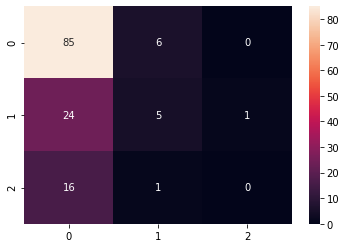

In [25]:
conf = confusion_matrix(y_test,y_pred_svc_poly)
sns.heatmap(conf,annot=True,fmt='d')

# Random Forest Classifier

In [26]:
rf = RandomForestClassifier(criterion='gini',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf = rf.predict(x_test) 
print('acc rf = {}'.format(accuracy_score(y_test,y_pred_rf)*100))
print('Precision rf = {}'.format(precision_score(y_test,y_pred_rf, average='micro')))
print('Recall rf = {}'.format(recall_score(y_test,y_pred_rf, average='micro')))
print('f1 rf = {}'.format(f1_score(y_test,y_pred_rf, average='micro')))
a3=((accuracy_score(y_test,y_pred_rf)*100))

acc rf = 75.36231884057972
Precision rf = 0.7536231884057971
Recall rf = 0.7536231884057971
f1 rf = 0.7536231884057971


<AxesSubplot:>

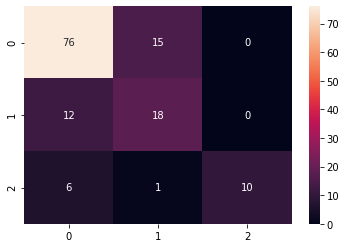

In [27]:
conf = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(conf,annot=True,fmt='d')

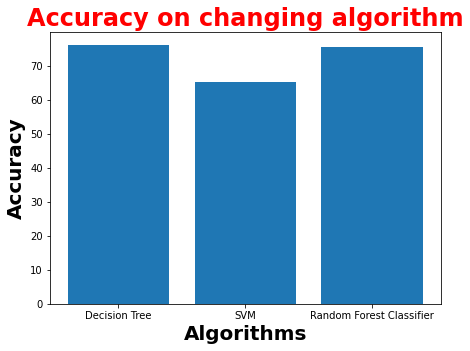

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
y=['Decision Tree','SVM', 'Random Forest Classifier']
 
# getting values against each value of y
x=[a1, a2, a3]
plt.bar(y, x)
 
# setting label of y-axis
plt.ylabel("Accuracy", fontweight='bold', color = 'black', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Algorithms", fontweight='bold', color = 'black', fontsize='20')
plt.title("Accuracy on changing algorithm", fontweight='bold', color = 'red', fontsize='24')
plt.show()

# Ensembling

In [29]:
from sklearn.ensemble import VotingClassifier
clf1=DecisionTreeClassifier()
clf2=SVC()
clf3=RandomForestClassifier()

eclf1=VotingClassifier(estimators=[('Decision Tree Classifier', clf1), ('SVM', clf2), ('RFC', clf3)], voting='hard')
eclf1.fit(x_train, y_train)
predictions=eclf1.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test, predictions)*100)
print("Precision Score:", precision_score(y_test, predictions, average='micro'))
print("Recall:", recall_score(y_test, predictions, average='micro'))
print("f1 score:", f1_score(y_test, predictions, average='micro'))

Accuracy Score: 73.91304347826086
Precision Score: 0.7391304347826086
Recall: 0.7391304347826086
f1 score: 0.7391304347826085


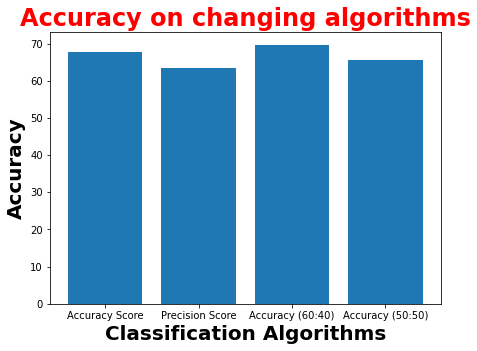

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
y=['Accuracy Score','Precision Score', 'Accuracy (60:40)', 'Accuracy (50:50)']
 
# getting values against each value of y
x=[acc1, acc2, acc3, acc4]
plt.bar(y, x)
 
# setting label of y-axis
plt.ylabel("Accuracy", fontweight='bold', color = 'black', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Classification Algorithms", fontweight='bold', color = 'black', fontsize='20')
plt.title("Accuracy on changing algorithms", fontweight='bold', color = 'red', fontsize='24')
plt.show()

# Hyperparameter Tuning

## Tuning Decision Tree

In [31]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)

### Changing train, test ratio to analyse change in accuracy

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.2)
t1=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_t1 = t1.predict(x_test)
dtacc1=accuracy_score(y_test,y_pred_t1)*100
dtacc1

71.42857142857143

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.3)
t2=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_t2 = t2.predict(x_test)
dtacc2=accuracy_score(y_test,y_pred_t2)*100
dtacc2

64.28571428571429

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.4)
t3=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_t3 = t3.predict(x_test)
dtacc3=accuracy_score(y_test,y_pred_t3)*100
dtacc3

72.02380952380952

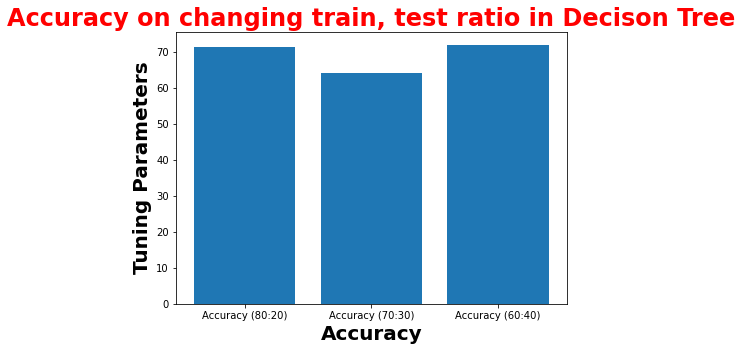

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
y=['Accuracy (80:20)','Accuracy (70:30)', 'Accuracy (60:40)']
 
# getting values against each value of y
x=[dtacc1, dtacc2, dtacc3]
plt.bar(y, x)
 
# setting label of y-axis
plt.ylabel("Tuning Parameters", fontweight='bold', color = 'black', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Accuracy", fontweight='bold', color = 'black', fontsize='20')
plt.title("Accuracy on changing train, test ratio in Decison Tree", fontweight='bold', color = 'red', fontsize='24')
plt.show()

### Changing the parameter: criterion- entropy, gini

In [37]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.3)

In [38]:
hp1=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_hp1 = hp1.predict(x_test)
print('Accuracy using ID3 = {}'.format(accuracy_score(y_test,y_pred_hp1)*100))

Accuracy using ID3 = 72.22222222222221


In [39]:
hp2=DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_hp2 = dt.predict(x_test)
print('Accuracy using CART = {}'.format(accuracy_score(y_test,y_pred_hp2)*100))

Accuracy using CART = 80.15873015873017


### Changing the parameter: splitter-best, random

In [40]:
hp3=DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_hp3 = hp3.predict(x_test)
print('Accuracy using ID3 with best splitter = {}'.format(accuracy_score(y_test,y_pred_hp3)*100))

Accuracy using ID3 with best splitter = 72.22222222222221


In [41]:
hp4=DecisionTreeClassifier(criterion='entropy',splitter='random', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_hp4 = hp4.predict(x_test)
print('Accuracy using ID3 with random splitter = {}'.format(accuracy_score(y_test,y_pred_hp4)*100))

Accuracy using ID3 with random splitter = 70.63492063492063


In [42]:
hp5=DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_hp5 = hp5.predict(x_test)
print('Accuracy using CART with best splitter  = {}'.format(accuracy_score(y_test,y_pred_hp5)*100))

Accuracy using CART with best splitter  = 79.36507936507937


In [43]:
hp6=DecisionTreeClassifier(criterion='gini',splitter='random', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_hp6 = hp6.predict(x_test)
print('Accuracy using CART with random splitter  = {}'.format(accuracy_score(y_test,y_pred_hp6)*100))

Accuracy using CART with random splitter  = 65.07936507936508


### Changing the parameter: max_depth

In [44]:
hp7=DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0).fit(x_train,y_train)
y_pred_hp7 = hp7.predict(x_test)
print('Accuracy using ID3 with max_depth 4 = {}'.format(accuracy_score(y_test,y_pred_hp7)*100))

Accuracy using ID3 with max_depth 4 = 73.80952380952381


In [45]:
hp8=DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0).fit(x_train,y_train)
y_pred_hp8 = hp8.predict(x_test)
print('Accuracy using ID3 with max_depth 5 = {}'.format(accuracy_score(y_test,y_pred_hp8)*100))

Accuracy using ID3 with max_depth 5 = 73.80952380952381


In [46]:
hp9=DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0).fit(x_train,y_train)
y_pred_hp9 = hp9.predict(x_test)
print('Accuracy using ID3 with max_depth 6 = {}'.format(accuracy_score(y_test,y_pred_hp9)*100))

Accuracy using ID3 with max_depth 6 = 75.39682539682539


In [47]:
hp10=DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0).fit(x_train,y_train)
y_pred_hp10 = hp10.predict(x_test)
print('Accuracy using CART with max_depth 4 = {}'.format(accuracy_score(y_test,y_pred_hp10)*100))

Accuracy using CART with max_depth 4 = 80.15873015873017


In [48]:
hp11=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0).fit(x_train,y_train)
y_pred_hp11 = hp11.predict(x_test)
print('Accuracy using CART with max_depth 5 = {}'.format(accuracy_score(y_test,y_pred_hp11)*100))

Accuracy using CART with max_depth 5 = 83.33333333333334


In [49]:
hp12=DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0).fit(x_train,y_train)
y_pred_hp12 = hp12.predict(x_test)
print('Accuracy using CART with max_depth 6 = {}'.format(accuracy_score(y_test,y_pred_hp12)*100))

Accuracy using CART with max_depth 6 = 81.74603174603175


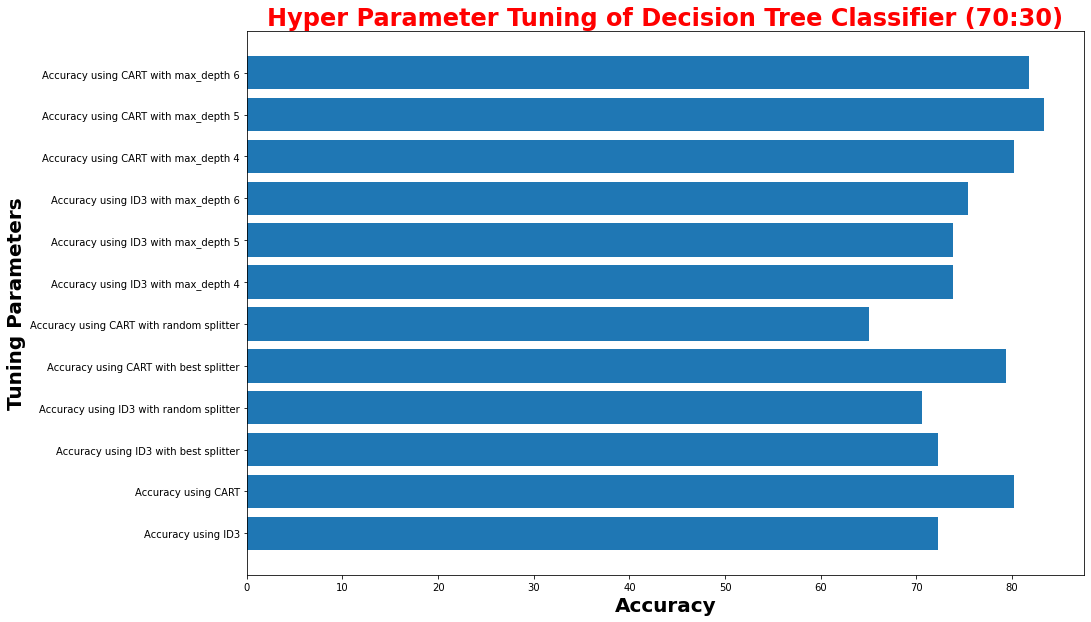

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
y=['Accuracy using ID3',
   'Accuracy using CART',
   'Accuracy using ID3 with best splitter',
   'Accuracy using ID3 with random splitter',
   'Accuracy using CART with best splitter',
   'Accuracy using CART with random splitter',
   'Accuracy using ID3 with max_depth 4',
   'Accuracy using ID3 with max_depth 5',
   'Accuracy using ID3 with max_depth 6',
   'Accuracy using CART with max_depth 4',
   'Accuracy using CART with max_depth 5',
   'Accuracy using CART with max_depth 6']
 
# getting values against each value of y
x=[accuracy_score(y_test,y_pred_hp1)*100,
  accuracy_score(y_test,y_pred_hp2)*100,
  accuracy_score(y_test,y_pred_hp3)*100,
  accuracy_score(y_test,y_pred_hp4)*100,
  accuracy_score(y_test,y_pred_hp5)*100,
  accuracy_score(y_test,y_pred_hp6)*100,
  accuracy_score(y_test,y_pred_hp7)*100,
  accuracy_score(y_test,y_pred_hp8)*100,
  accuracy_score(y_test,y_pred_hp9)*100,
  accuracy_score(y_test,y_pred_hp10)*100,
  accuracy_score(y_test,y_pred_hp11)*100,
  accuracy_score(y_test,y_pred_hp12)*100]
plt.barh(y, x)
 
# setting label of y-axis
plt.ylabel("Tuning Parameters", fontweight='bold', color = 'black', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Accuracy", fontweight='bold', color = 'black', fontsize='20')
plt.title("Hyper Parameter Tuning of Decision Tree Classifier (70:30)", fontweight='bold', color = 'red', fontsize='24')
plt.show()

## Tuning Support Vector Machine

In [52]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)

### Changing the train, test ratio to analyse accuracy

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.2)
svc_rbf = SVC(kernel='rbf',degree=6).fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)
svm1=accuracy_score(y_test,y_pred_svc_rbf)
acc1=svm1*100
acc1

67.85714285714286

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.3)
svc_rbf = SVC(kernel='rbf',degree=6).fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)
svm2=accuracy_score(y_test,y_pred_svc_rbf)
acc2=svm2*100
acc2

63.49206349206349

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.4)
svc_rbf = SVC(kernel='rbf',degree=6).fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)
svm3=accuracy_score(y_test,y_pred_svc_rbf)
acc3=svm3*100
acc3

69.64285714285714

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.5)
svc_rbf = SVC(kernel='rbf',degree=6).fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)
svm4=accuracy_score(y_test,y_pred_svc_rbf)
acc4=svm4*100
acc4

65.55023923444976

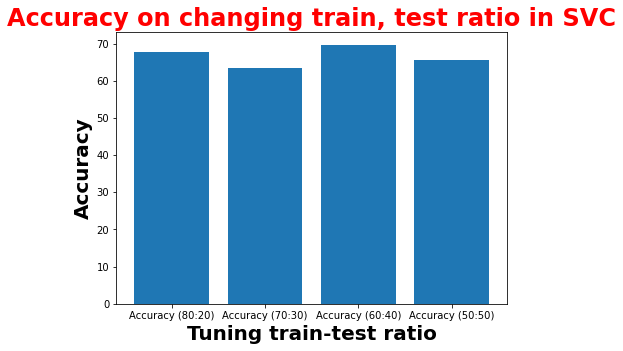

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
y=['Accuracy (80:20)','Accuracy (70:30)', 'Accuracy (60:40)', 'Accuracy (50:50)']
 
# getting values against each value of y
x=[acc1, acc2, acc3, acc4]
plt.bar(y, x)
 
# setting label of y-axis
plt.ylabel("Accuracy", fontweight='bold', color = 'black', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Tuning train-test ratio", fontweight='bold', color = 'black', fontsize='20')
plt.title("Accuracy on changing train, test ratio in SVC", fontweight='bold', color = 'red', fontsize='24')
plt.show()

### Changing Kernels - rbf, poly, linear, sigmoid

In [59]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.33)

In [60]:
svc_rbf = SVC(kernel='rbf',degree=6).fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)
print('acc svc rbf = {}'.format(accuracy_score(y_test,y_pred_svc_rbf)*100))

acc svc rbf = 64.4927536231884


In [61]:
svc_poly = SVC(kernel='poly',degree=6).fit(x_train,y_train)
y_pred_svc_poly = svc_poly.predict(x_test)
print('acc svc poly = {}'.format(accuracy_score(y_test,y_pred_svc_poly)*100))

acc svc poly = 62.31884057971014


In [62]:
svc_linear = SVC(kernel='linear',degree=6).fit(x_train,y_train)
y_pred_svc_linear = svc_linear.predict(x_test)
print('acc svc linear = {}'.format(accuracy_score(y_test,y_pred_svc_linear)*100))

acc svc linear = 63.76811594202898


In [63]:
svc_sigmoid = SVC(kernel='sigmoid',degree=6).fit(x_train,y_train)
y_pred_svc_sigmoid = svc_sigmoid.predict(x_test)
print('acc svc sigmoid = {}'.format(accuracy_score(y_test,y_pred_svc_sigmoid)*100))

acc svc sigmoid = 63.04347826086957


### Changing degree of poly kernel

In [64]:
svc_poly_d3 = SVC(kernel='poly',degree=3).fit(x_train,y_train)
y_pred_svc_poly_d3 = svc_poly_d3.predict(x_test)
print('acc svc poly degree 3 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d3)*100))

acc svc poly degree 3 = 67.3913043478261


In [65]:
svc_poly_d4 = SVC(kernel='poly',degree=4).fit(x_train,y_train)
y_pred_svc_poly_d4 = svc_poly_d4.predict(x_test)
print('acc svc poly degree 4 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d4)*100))

acc svc poly degree 4 = 68.11594202898551


In [66]:
svc_poly_d5 = SVC(kernel='poly',degree=5).fit(x_train,y_train)
y_pred_svc_poly_d5 = svc_poly_d5.predict(x_test)
print('acc svc poly degree 5 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d5)*100))

acc svc poly degree 5 = 64.4927536231884


In [67]:
svc_poly_d6 = SVC(kernel='poly',degree=6).fit(x_train,y_train)
y_pred_svc_poly_d6 = svc_poly_d6.predict(x_test)
print('acc svc poly degree 6 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d6)*100))

acc svc poly degree 6 = 62.31884057971014


In [68]:
svc_poly_d7 = SVC(kernel='poly',degree=7).fit(x_train,y_train)
y_pred_svc_poly_d7 = svc_poly_d7.predict(x_test)
print('acc svc poly degree 7 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d7)*100))

acc svc poly degree 7 = 63.76811594202898


In [69]:
svc_poly_d8 = SVC(kernel='poly',degree=8).fit(x_train,y_train)
y_pred_svc_poly_d8 = svc_poly_d8.predict(x_test)
print('acc svc poly degree 8 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d8)*100))

acc svc poly degree 8 = 63.76811594202898


In [70]:
svc_poly_d9 = SVC(kernel='poly',degree=9).fit(x_train,y_train)
y_pred_svc_poly_d9 = svc_poly_d9.predict(x_test)
print('acc svc poly degree 9 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d9)*100))

acc svc poly degree 9 = 64.4927536231884


### Changing degree of rbf kernel

In [71]:
svc_rbf_d4 = SVC(kernel='rbf',degree=4).fit(x_train,y_train)
y_pred_svc_rbf_d4 = svc_rbf_d4.predict(x_test)
print('acc svc rbf with degree 4 = {}'.format(accuracy_score(y_test,y_pred_svc_rbf_d4)*100))

acc svc rbf with degree 4 = 64.4927536231884


In [72]:
svc_rbf_d5 = SVC(kernel='rbf',degree=5).fit(x_train,y_train)
y_pred_svc_rbf_d5 = svc_rbf_d5.predict(x_test)
print('acc svc rbf with degree 5 = {}'.format(accuracy_score(y_test,y_pred_svc_rbf_d5)*100))

acc svc rbf with degree 5 = 64.4927536231884


In [73]:
svc_rbf_d6 = SVC(kernel='rbf',degree=6).fit(x_train,y_train)
y_pred_svc_rbf_d6 = svc_rbf_d6.predict(x_test)
print('acc svc rbf with degree 6 = {}'.format(accuracy_score(y_test,y_pred_svc_rbf_d6)*100))

acc svc rbf with degree 6 = 64.4927536231884


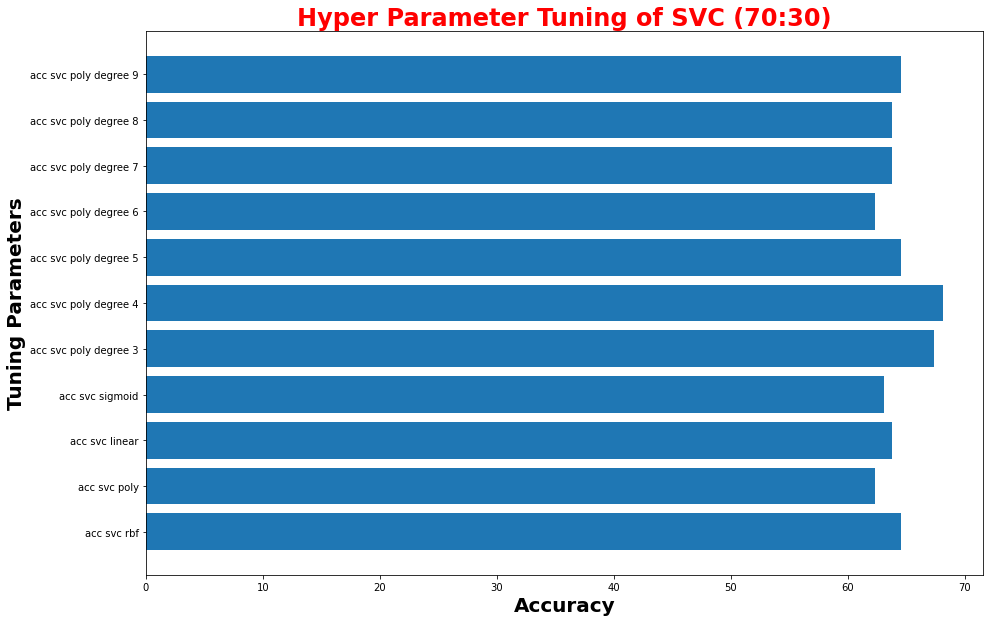

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
y=['acc svc rbf',
   'acc svc poly',
   'acc svc linear',
   'acc svc sigmoid',
   'acc svc poly degree 3',
   'acc svc poly degree 4',
   'acc svc poly degree 5',
   'acc svc poly degree 6',
   'acc svc poly degree 7',
   'acc svc poly degree 8',
   'acc svc poly degree 9'
  ]
 
# getting values against each value of y
x=[accuracy_score(y_test,y_pred_svc_rbf)*100,
   accuracy_score(y_test,y_pred_svc_poly)*100,
   accuracy_score(y_test,y_pred_svc_linear)*100,
   accuracy_score(y_test,y_pred_svc_sigmoid)*100,
   accuracy_score(y_test,y_pred_svc_poly_d3)*100,
   accuracy_score(y_test,y_pred_svc_poly_d4)*100,
   accuracy_score(y_test,y_pred_svc_poly_d5)*100,
   accuracy_score(y_test,y_pred_svc_poly_d6)*100,
   accuracy_score(y_test,y_pred_svc_poly_d7)*100,
   accuracy_score(y_test,y_pred_svc_poly_d8)*100,
   accuracy_score(y_test,y_pred_svc_poly_d9)*100
  ]
plt.barh(y, x)
 
# setting label of y-axis
plt.ylabel("Tuning Parameters", fontweight='bold', color = 'black', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Accuracy", fontweight='bold', color = 'black', fontsize='20')
plt.title("Hyper Parameter Tuning of SVC (70:30)", fontweight='bold', color = 'red', fontsize='24')
plt.show()

## Tuning Random Forest Classifier

### Changing train, test ratio and observing the change in accuracy

In [76]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.2)
rf = RandomForestClassifier(criterion='gini',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf = rf.predict(x_test) 
rfacc1=accuracy_score(y_test,y_pred_rf)*100
rfacc1

78.57142857142857

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.3)
rf = RandomForestClassifier(criterion='gini',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf = rf.predict(x_test) 
rfacc2=accuracy_score(y_test,y_pred_rf)*100
rfacc2

73.80952380952381

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.4)
rf = RandomForestClassifier(criterion='gini',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf = rf.predict(x_test) 
rfacc3=accuracy_score(y_test,y_pred_rf)*100
rfacc3

77.38095238095238

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.5)
rf = RandomForestClassifier(criterion='gini',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf = rf.predict(x_test) 
rfacc4=accuracy_score(y_test,y_pred_rf)*100
rfacc4

76.07655502392345

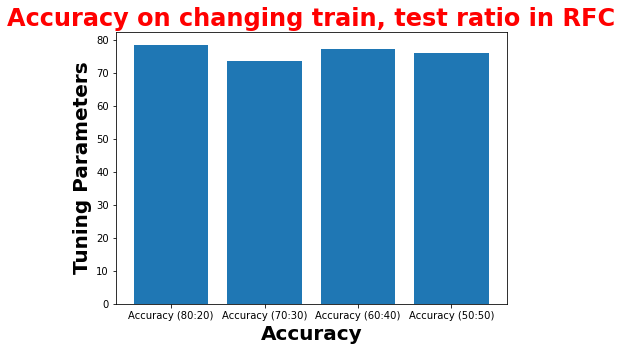

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
y=['Accuracy (80:20)','Accuracy (70:30)', 'Accuracy (60:40)', 'Accuracy (50:50)']
 
# getting values against each value of y
x=[rfacc1, rfacc2, rfacc3, rfacc4]
plt.bar(y, x)
 
# setting label of y-axis
plt.ylabel("Tuning Parameters", fontweight='bold', color = 'black', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Accuracy", fontweight='bold', color = 'black', fontsize='20')
plt.title("Accuracy on changing train, test ratio in RFC", fontweight='bold', color = 'red', fontsize='24')
plt.show()

### Changing the parameters to observe its effect on accuracy of the model

In [82]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.3)

#### Changing the criterion parameter: gini and entropy

In [83]:
rf = RandomForestClassifier(criterion='gini',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf1 = rf.predict(x_test) 
print('acc rf with criterion: gini index = {}'.format(accuracy_score(y_test,y_pred_rf1)*100))

acc rf with criterion: gini index = 72.22222222222221


In [84]:
rf = RandomForestClassifier(criterion='entropy',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf2 = rf.predict(x_test) 
print('acc rf with criterion: entropy = {}'.format(accuracy_score(y_test,y_pred_rf2)*100))

acc rf with criterion: entropy = 73.80952380952381


#### Changing the max depth of the tree and analysing the accuracy

In [85]:
rf = RandomForestClassifier(criterion='gini',max_depth=15, random_state=0).fit(x_train,y_train)
y_pred_rf3 = rf.predict(x_test) 
print('acc rf with gini and depth:15 = {}'.format(accuracy_score(y_test,y_pred_rf3)*100))

acc rf with gini and depth:15 = 70.63492063492063


In [86]:
rf = RandomForestClassifier(criterion='gini',max_depth=20, random_state=0).fit(x_train,y_train)
y_pred_rf4 = rf.predict(x_test) 
print('acc rf with gini and depth: 20 = {}'.format(accuracy_score(y_test,y_pred_rf4)*100))

acc rf with gini and depth: 20 = 70.63492063492063


In [87]:
rf = RandomForestClassifier(criterion='gini',max_depth=25, random_state=0).fit(x_train,y_train)
y_pred_rf5 = rf.predict(x_test) 
print('acc rf with gini and depth: 25 = {}'.format(accuracy_score(y_test,y_pred_rf5)*100))

acc rf with gini and depth: 25 = 70.63492063492063


In [88]:
rf = RandomForestClassifier(criterion='gini',max_depth=30, random_state=0).fit(x_train,y_train)
y_pred_rf6 = rf.predict(x_test) 
print('acc rf with gini and depth: 30 = {}'.format(accuracy_score(y_test,y_pred_rf6)*100))

acc rf with gini and depth: 30 = 70.63492063492063


In [89]:
rf = RandomForestClassifier(criterion='entropy',max_depth=35, random_state=0).fit(x_train,y_train)
y_pred_rf7 = rf.predict(x_test) 
print('acc rf with gini and depth: 35 = {}'.format(accuracy_score(y_test,y_pred_rf7)*100))

acc rf with gini and depth: 35 = 67.46031746031747


In [90]:
rf = RandomForestClassifier(criterion='entropy',max_depth=15, random_state=0).fit(x_train,y_train)
y_pred_rf8 = rf.predict(x_test) 
print('acc rf with entropy and depth:15 = {}'.format(accuracy_score(y_test,y_pred_rf8)*100))

acc rf with entropy and depth:15 = 68.25396825396825


In [91]:
rf = RandomForestClassifier(criterion='entropy',max_depth=20, random_state=0).fit(x_train,y_train)
y_pred_rf9 = rf.predict(x_test) 
print('acc rf with entropy and depth: 20 = {}'.format(accuracy_score(y_test,y_pred_rf9)*100))

acc rf with entropy and depth: 20 = 67.46031746031747


In [92]:
rf = RandomForestClassifier(criterion='entropy',max_depth=25, random_state=0).fit(x_train,y_train)
y_pred_rf10 = rf.predict(x_test) 
print('acc rf with entropy and depth: 25 = {}'.format(accuracy_score(y_test,y_pred_rf10)*100))

acc rf with entropy and depth: 25 = 67.46031746031747


In [93]:
rf = RandomForestClassifier(criterion='entropy',max_depth=30, random_state=0).fit(x_train,y_train)
y_pred_rf11 = rf.predict(x_test) 
print('acc rf with entropy and depth: 30 = {}'.format(accuracy_score(y_test,y_pred_rf11)*100))

acc rf with entropy and depth: 30 = 67.46031746031747


In [94]:
rf = RandomForestClassifier(criterion='entropy',max_depth=35, random_state=0).fit(x_train,y_train)
y_pred_rf12 = rf.predict(x_test) 
print('acc rf with entropy and depth: 35 = {}'.format(accuracy_score(y_test,y_pred_rf12)*100))

acc rf with entropy and depth: 35 = 67.46031746031747


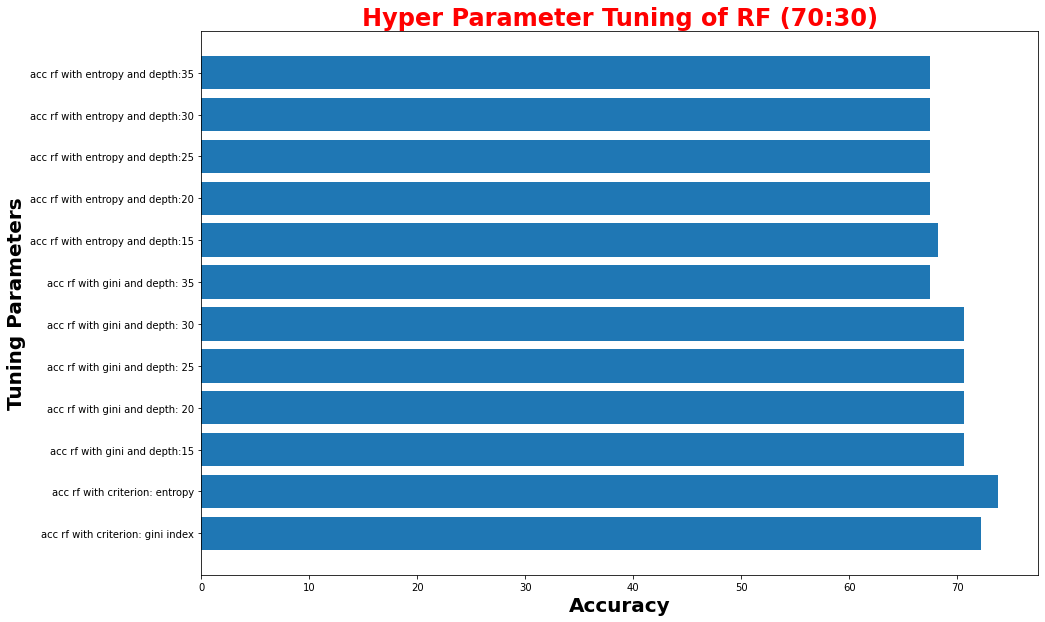

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
y=['acc rf with criterion: gini index',
   'acc rf with criterion: entropy',
   'acc rf with gini and depth:15',
   'acc rf with gini and depth: 20',
   'acc rf with gini and depth: 25',
   'acc rf with gini and depth: 30',
   'acc rf with gini and depth: 35',
   'acc rf with entropy and depth:15',
   'acc rf with entropy and depth:20',
   'acc rf with entropy and depth:25',
   'acc rf with entropy and depth:30',
   'acc rf with entropy and depth:35'
  ]
 
# getting values against each value of y
x=[accuracy_score(y_test,y_pred_rf1)*100,
   accuracy_score(y_test,y_pred_rf2)*100,
   accuracy_score(y_test,y_pred_rf3)*100,
   accuracy_score(y_test,y_pred_rf4)*100,
   accuracy_score(y_test,y_pred_rf5)*100,
   accuracy_score(y_test,y_pred_rf6)*100,
   accuracy_score(y_test,y_pred_rf7)*100,
   accuracy_score(y_test,y_pred_rf8)*100,
   accuracy_score(y_test,y_pred_rf9)*100,
   accuracy_score(y_test,y_pred_rf10)*100,
   accuracy_score(y_test,y_pred_rf11)*100,
   accuracy_score(y_test,y_pred_rf12)*100
  ]
plt.barh(y, x)
 
# setting label of y-axis
plt.ylabel("Tuning Parameters", fontweight='bold', color = 'black', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Accuracy", fontweight='bold', color = 'black', fontsize='20')
plt.title("Hyper Parameter Tuning of RF (70:30)", fontweight='bold', color = 'red', fontsize='24')
plt.show()